In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Bước 1: Đọc dữ liệu từ file Excel
file_path = "HR_Analytics_With_HasLeft.xlsx"
df = pd.read_excel(file_path)

# Bước 2: Xử lý ngày tháng - chuyển "Join Date" thành số ngày kể từ ngày nhỏ nhất
df["Join Date"] = pd.to_datetime(df["Join Date"])
reference_date = df["Join Date"].min()
df["Join Days"] = (df["Join Date"] - reference_date).dt.days

# Bước 3: Xóa cột "Join Date" gốc (đã thay bằng Join Days)
df.drop(columns=["Join Date"], inplace=True)

# Bước 4: Mã hóa các cột không phải dạng số còn lại
non_numeric_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()
label_encoders = {}

for col in non_numeric_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Lưu lại encoder nếu cần inverse_transform

# Lúc này df đã sẵn sàng cho huấn luyện mô hình
# Bạn có thể tách X, y để huấn luyện như sau:
X = df.drop(columns=["Has Left", "Exit Date"])

y = df["Has Left"]
X.head

<bound method NDFrame.head of      Employee ID  Name  Department  Gender  Age  Job Level  \
0              0    13           2       0   26          3   
1              1   100           0       0   46          2   
2              2    73           4       1   55          2   
3              3   174           3       0   45          1   
4              4    91           4       0   45          0   
..           ...   ...         ...     ...  ...        ...   
495          495   157           4       1   28          1   
496          496   155           4       1   57          1   
497          497   141           4       0   46          0   
498          498   125           0       1   33          3   
499          499    78           3       1   38          0   

     Performance Rating  Monthly Salary  Training Hours  Exit Reason  \
0                     2         9599908              19            5   
1                     0         9003171              21            5   
2        

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Khởi tạo và huấn luyện mô hình Logistic Regression
#model = LogisticRegression(penalty='l1', C=0.5,solver='liblinear', max_iter=5000,class_weight='balanced', random_state=42)
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
#Khởi tạo và huấn luyện SVM
svc=SVC(kernel='poly',C=7) 
svc.fit(X_train, y_train)


SVC(C=7, kernel='poly')

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Dự đoán trên tập test
y_pred = model.predict(X_test)

# In kết quả đánh giá
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[123   0]
 [ 27   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       123
           1       0.00      0.00      0.00        27

    accuracy                           0.82       150
   macro avg       0.41      0.50      0.45       150
weighted avg       0.67      0.82      0.74       150

Accuracy Score: 0.82


c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Dự đoán trên tập test
y_pred = svc.predict(X_test)

# In kết quả đánh giá
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[123   0]
 [ 27   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       123
           1       0.00      0.00      0.00        27

    accuracy                           0.82       150
   macro avg       0.41      0.50      0.45       150
weighted avg       0.67      0.82      0.74       150

Accuracy Score: 0.82


c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\21H1 HNQA\AppData\Local\Temp\ipykernel_1264\2454955600.py:7: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  plt.tight_layout()
c:\Program Files\Python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


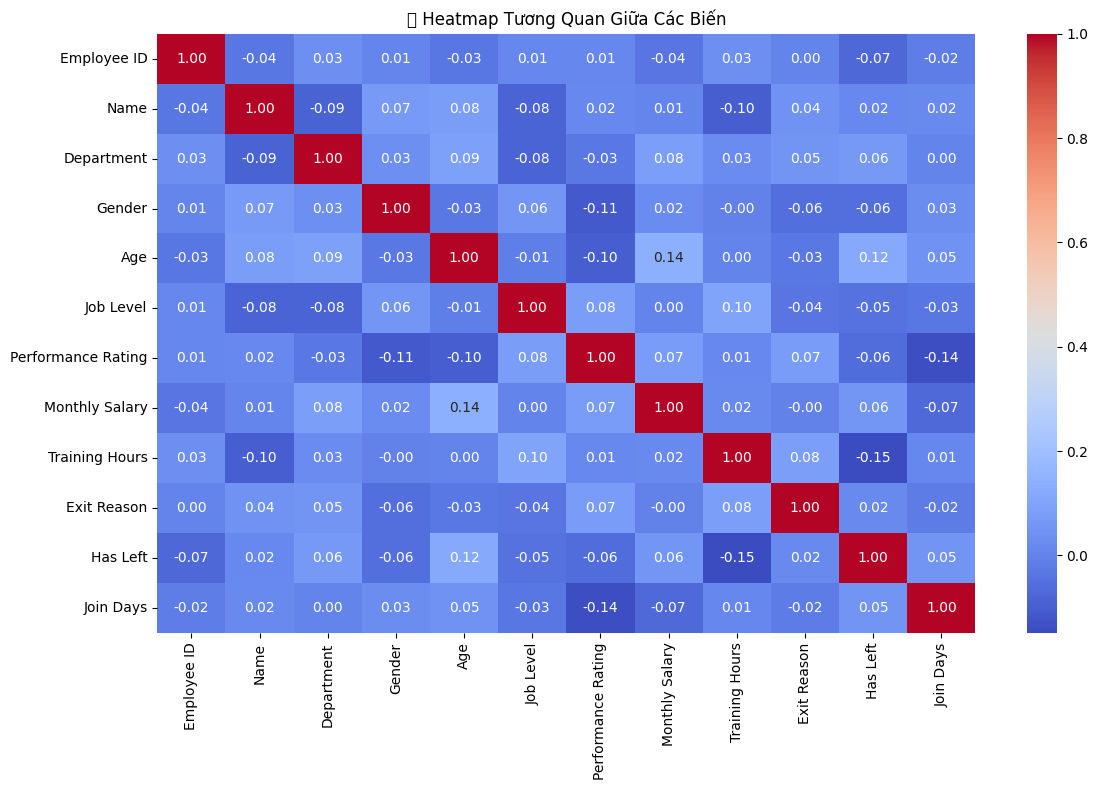

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("📌 Heatmap Tương Quan Giữa Các Biến")
plt.tight_layout()
plt.show()
#Hệ số tương quan gần +1 hoặc -1 → mối quan hệ mạnh.
#Gần 0 → ít hoặc không tương quan tuyến tính.
#Các biến như "Monthly Salary", "Exit Reason", "Performance Rating" thường có tương quan đáng kể với Has Left.


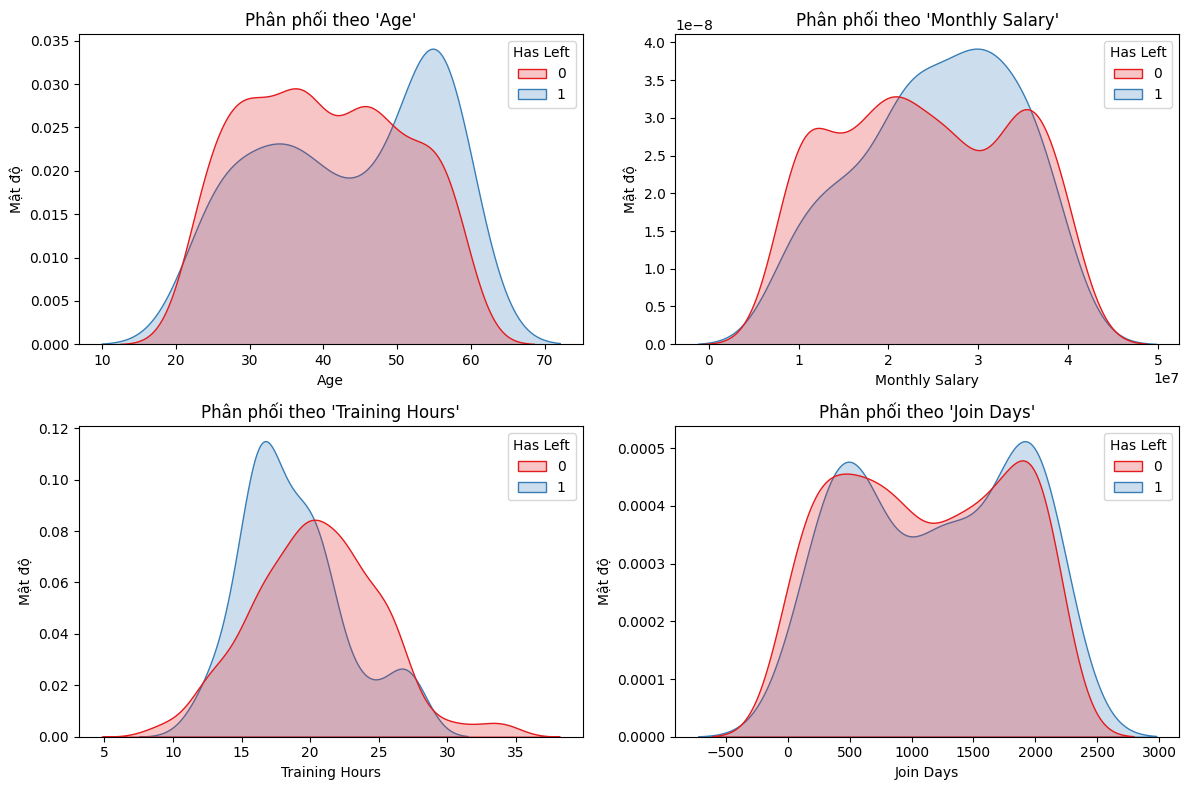

In [33]:
# Xác định các cột đặc trưng dạng số (ngoại trừ Has Left)
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns.drop("Has Left")

# Thiết lập layout cho nhiều biểu đồ
n_cols = 2
n_rows = (len(numeric_features) + 1) // n_cols

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(numeric_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(data=df, x=col, hue="Has Left", fill=True, common_norm=False, palette="Set1")
    plt.title(f"Phân phối theo '{col}'", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("Mật độ")

plt.tight_layout()
plt.show()
#Biểu đồ cho biết sự khác biệt phân bố giữa hai nhóm Has Left = 0 và Has Left = 1.
#Ví dụ: Nếu ở đặc trưng Monthly Salary, nhóm nghỉ việc tập trung nhiều ở mức lương thấp, điều đó có thể gợi ý rằng mức lương ảnh hưởng đến nghỉ việc.
#Phân phối lệch rõ rệt → đặc trưng đó có thể mang tính phân loại tốt.



In [21]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Dự đoán trên tập test
y_pred = model.predict(X_test)

# In kết quả đánh giá
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[123   0]
 [ 27   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       123
           1       0.00      0.00      0.00        27

    accuracy                           0.82       150
   macro avg       0.41      0.50      0.45       150
weighted avg       0.67      0.82      0.74       150

Accuracy Score: 0.82


c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Program Files\Python38\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
